In [93]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from gensim import corpora
from nltk.corpus import stopwords
import re
%matplotlib inline

In [94]:
trainDF=pd.read_csv("Data/train.csv")
testDF=pd.read_csv("Data/test.csv")

In [95]:
trainDF.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Combining Training and test data for simplicity

In [96]:
trainDF['data']='train'
testDF['data']='test'

In [97]:
frame = [trainDF,testDF]
df = pd.concat(frame,ignore_index = True)

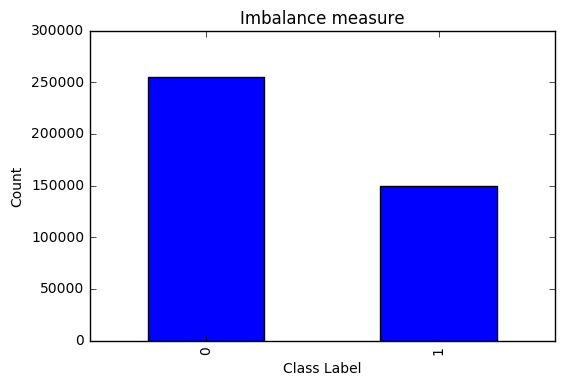

In [98]:
trainDF.is_duplicate.value_counts().plot(kind='bar',title='Imbalance measure')
plt.xlabel('Class Label')
plt.ylabel('Count')

In [99]:
frame = [df.question1,df.question2]
stop = stopwords.words('english')
# stop=['my','i','the','for']
questions = pd.concat(frame,ignore_index = True)

In [100]:
questions=questions.str.lower()

In [101]:
questions.replace({r'[^a-zA-Z]':' '}, regex=True, inplace=True)

In [102]:
questions.head()

0    what is the step by step guide to invest in sh...
1    what is the story of kohinoor  koh i noor  dia...
2    how can i increase the speed of my internet co...
3    why am i mentally very lonely  how can i solve...
4    which one dissolve in water quikly sugar  salt...
dtype: object

In [56]:
questions.replace(stop, regex = True, inplace = True)

In [60]:
questions[questions.isnull()]


1450980    NaN
1865722    NaN
2855866    NaN
2951927    NaN
3533581    NaN
3971896    NaN
4098287    NaN
4424400    NaN
dtype: object

In [61]:
questions.fillna("", inplace = True)

In [44]:
# questions=questions.apply(lambda x: [item for item in x if item not in stop])

In [62]:
def cleanQuestions(question):
    
    question=re.sub(r'[\s]+', ' ', question,flags=re.MULTILINE)
    return question

In [63]:
questions=questions.apply(cleanQuestions)


In [65]:
questions=questions.str.split()

In [66]:
questions.head()

0    [what, is, the, step, by, step, guide, to, inv...
1    [what, is, the, story, of, kohinoor, (koh-i-no...
2    [how, can, i, increase, the, speed, of, my, in...
3    [why, am, i, mentally, very, lonely, how, can,...
4    [which, one, dissolve, in, water, quikly, suga...
dtype: object

In [69]:
dictionary=corpora.Dictionary(questions)



In [74]:
dictionary.save('temp.dict')

In [75]:
print dictionary

Dictionary(254663 unique tokens: [u'murwara', u'considered,', u'considered.', u'pieces/rest', u'(photos)']...)


In [76]:
a=['what', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'get', 'a', 'gun']
dictionary.doc2bow(a)

[(0, 1),
 (1, 1),
 (3, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (10, 1),
 (17, 1),
 (333, 1),
 (5398, 1)]

In [81]:
from subprocess import check_output
print(check_output(["ls","Data/"]).decode("utf8"))

#cookies.txt#
cookies.txt
test.csv
test.csv.zip
train.csv
train.csv.zip

